In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [4]:
y_train = y_train.reshape(-1,)

In [5]:
# Reshape converting 2D to 1D
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [6]:
# This code normalazation
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
from tensorflow.keras import layers, models
lenet = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'), #C1
    keras.layers.Conv2D(32, kernel_size=3, strides=1, activation='relu', padding='same'), #C2
    keras.layers.MaxPooling2D(pool_size=2, strides=2), #S1
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same'), #C3
    keras.layers.Conv2D(64, kernel_size=3, strides=1, activation='relu', padding='same'), #C4
    keras.layers.MaxPooling2D(pool_size=2, strides=2), #S2
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(128, kernel_size=3, strides=1, activation='relu', padding='same'), #C5
    keras.layers.Conv2D(128, kernel_size=3, strides=1, activation='relu', padding='same'), #C6
    keras.layers.MaxPooling2D(pool_size=2, strides=2), #S3
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(512, activation='relu'), #F1
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [10]:
lenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [11]:
lenet.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [14]:
hist = lenet.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test),verbose=1)

Epoch 1/5
1563/1563 [==============================] - 397s 254ms/step - loss: 1.2135 - accuracy: 0.5651 - val_loss: 1.0869 - val_accuracy: 0.6111
Epoch 2/5
1563/1563 [==============================] - 406s 260ms/step - loss: 1.0362 - accuracy: 0.6328 - val_loss: 0.8905 - val_accuracy: 0.6853
Epoch 3/5
1563/1563 [==============================] - 403s 258ms/step - loss: 0.9405 - accuracy: 0.6669 - val_loss: 0.8178 - val_accuracy: 0.7106
Epoch 4/5
1563/1563 [==============================] - 395s 253ms/step - loss: 0.8742 - accuracy: 0.6951 - val_loss: 0.8158 - val_accuracy: 0.7195
Epoch 5/5
1563/1563 [==============================] - 390s 250ms/step - loss: 0.8228 - accuracy: 0.7124 - val_loss: 0.7578 - val_accuracy: 0.7349


In [17]:
aug_data = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

aug_data.fit(x_train)

from tensorflow.keras import layers, models
lenet =  keras.models.Sequential([
         keras.layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(32,32,3), padding='same'),
         keras.layers.BatchNormalization(),
         keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same'),
         keras.layers.BatchNormalization(),
         keras.layers.MaxPooling2D(pool_size=2),
         keras.layers.Dropout(0.25),
         keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'),
         keras.layers.BatchNormalization(),
         keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'),
         keras.layers.BatchNormalization(),
         keras.layers.MaxPooling2D(pool_size=2),
         keras.layers.Dropout(0.25),
         keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'),
         keras.layers.BatchNormalization(),
         keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding='same'),
         keras.layers.BatchNormalization(),
         keras.layers.MaxPooling2D(pool_size=2),
         keras.layers.Dropout(0.25),
          keras.layers.Flatten(),
         keras.layers.Dense(512, activation='relu'),
         keras.layers.Dropout(0.5),
         keras.layers.Dense(10, activation='softmax')
])

lenet.compile(optimizer='adam',  loss=keras.losses.sparse_categorical_crossentropy,  metrics=['accuracy'])

history = lenet.fit(aug_data.flow(x_train, y_train, batch_size=64), epochs=1, validation_data=(x_test, y_test))


782/782 [==============================] - 489s 621ms/step - loss: 1.7232 - accuracy: 0.3916 - val_loss: 1.3738 - val_accuracy: 0.5272


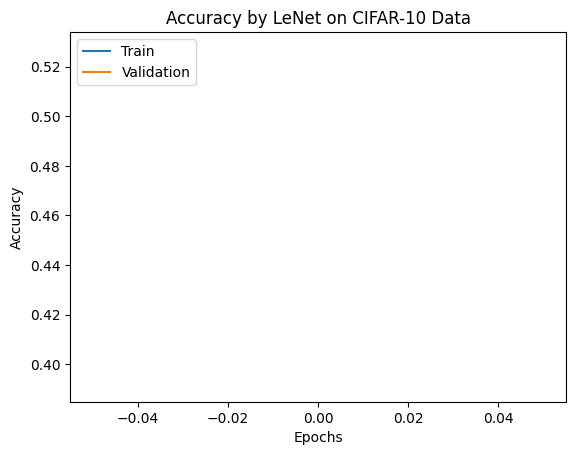

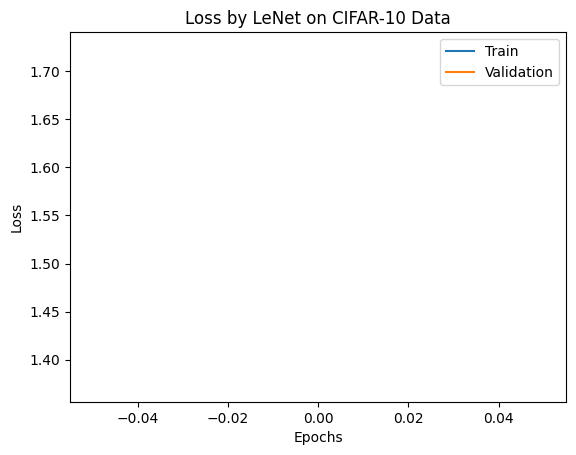

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy by LeNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss by LeNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_predictions= lenet.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

confusion_matrix(y_test, y_predictions)

313/313 [==============================] - 22s 71ms/step


array([[612,  54,  29,  14,  23,   4,  24,  11, 167,  62],
       [ 19, 823,   0,   4,   1,   0,   9,   1,  43, 100],
       [114,  36, 173,  76, 174,  89, 199,  39,  42,  58],
       [ 47,  61,  27, 256,  51, 155, 228,  35,  29, 111],
       [ 44,  29,  29,  29, 399,  24, 279,  97,  18,  52],
       [ 24,  20,  23, 163,  70, 403, 108,  85,  14,  90],
       [ 10,  19,  13,  41,  19,  16, 813,   2,  10,  57],
       [ 27,  28,   3,  36,  88,  72,  63, 537,   8, 138],
       [109, 111,   2,   6,   5,   2,  14,   4, 695,  52],
       [ 37, 321,   0,   5,   1,   0,  17,   4,  54, 561]])

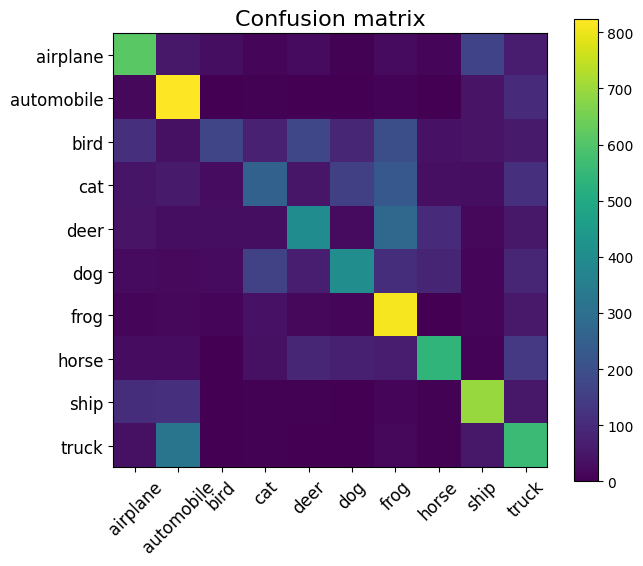

In [20]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions))
plt.xticks(np.arange(10), classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes, fontsize=12)
plt.colorbar()
plt.show()

In [21]:
print("Test accuracy:", accuracy_score(y_test, y_predictions))

Test accuracy: 0.5272


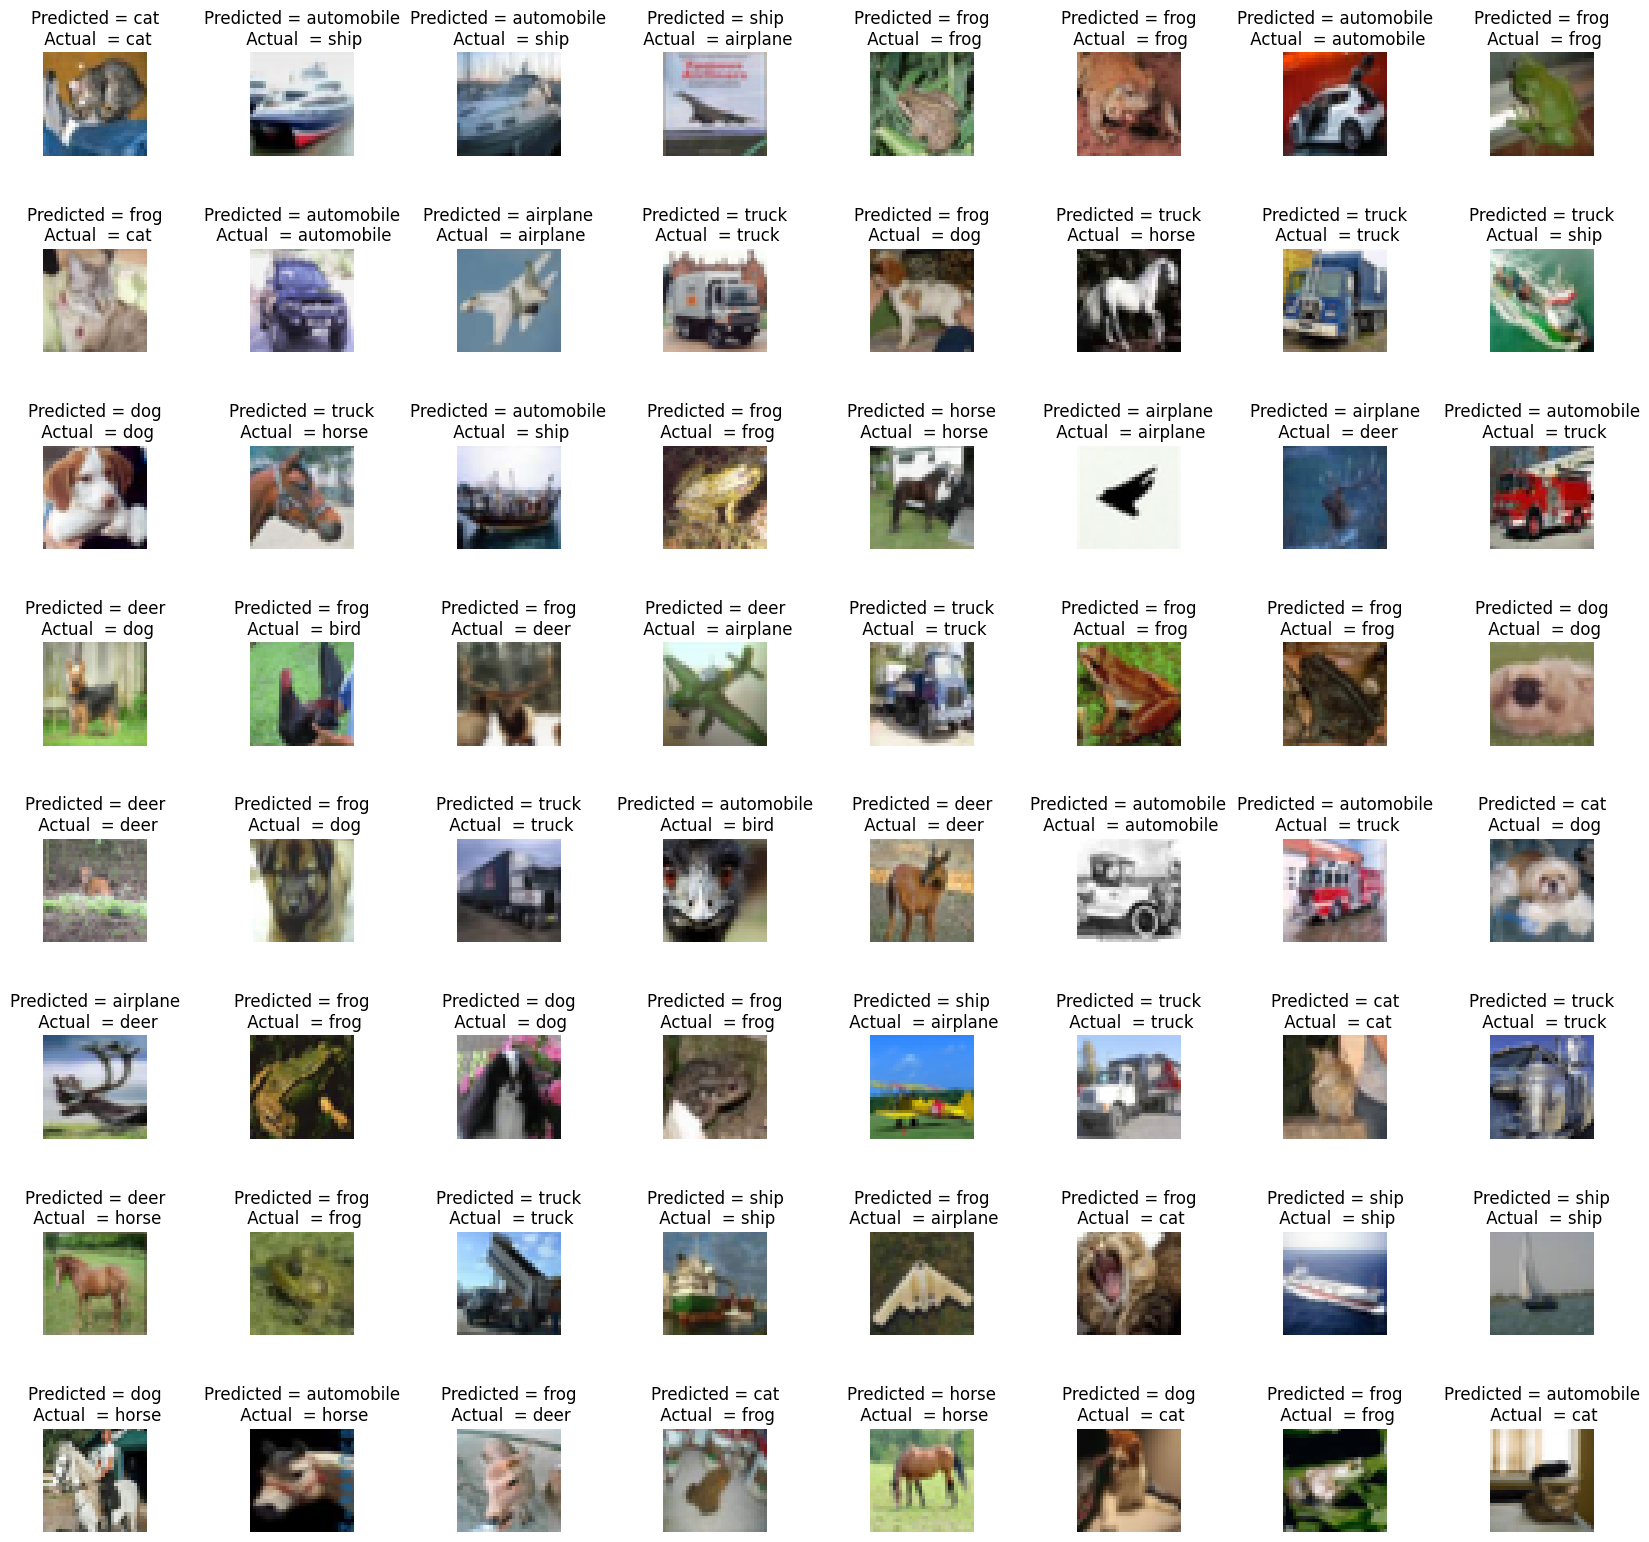

In [22]:
L = 8
W = 8
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes[y_predictions[i]], classes[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import SGD, Adam


In [25]:
#Define Alexnet Model
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=16,kernel_size=(3,3),strides=(4,4),input_shape=(32,32,3), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(5,5),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(30,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(20,(3,3),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Flatten())
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(10,activation='softmax'))

AlexNet.compile(optimizer='SGD', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
AlexNet.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 8, 8, 16)          448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 4, 4, 16)          0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 4, 4, 60)          24060     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 2, 2, 60)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 2, 2, 60)          32460     
                                                                 
 conv2d_27 (Conv2D)          (None, 2, 2, 30)         